In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt


In [67]:
# nltk.download('stopwords')
# nltk.download('punkt_tab')  
# nltk.download('punkt') 
# nltk.download('averaged_perceptron_tagger_eng')  # version demandée par ton error
# nltk.download('wordnet')
# nltk.download('omw-1.4')

 


In [68]:
text_df = pd.read_csv(r'Dataset_projet_pretraitement_textes_images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


## Pré-traitement du texte

In [69]:
#Regex pour ne garder que les caractères alphanumérique
text_df['description_nettoyee'] = text_df['description'].str.replace(r'[^A-Za-z0-9]', ' ', regex=True).str.lower()
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description_nettoyee
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications of sathiyas cotton bath towel ...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features of jaipur print cotton floral kin...


In [70]:
text_df['tokens'] = text_df['description_nettoyee'].apply(word_tokenize)
text_df['name_tokens'] = text_df['product_name'].apply(word_tokenize)
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,description_nettoyee,tokens,name_tokens
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of elegance polyester multicolor ...,"[key, features, of, elegance, polyester, multi...","[Elegance, Polyester, Multicolor, Abstract, Ey..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications of sathiyas cotton bath towel ...,"[specifications, of, sathiyas, cotton, bath, t...","[Sathiyas, Cotton, Bath, Towel]"
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features of eurospa cotton terry face towe...,"[key, features, of, eurospa, cotton, terry, fa...","[Eurospa, Cotton, Terry, Face, Towel, Set]"
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features of santosh royal fashion cotton p...,"[key, features, of, santosh, royal, fashion, c...","[SANTOSH, ROYAL, FASHION, Cotton, Printed, Kin..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features of jaipur print cotton floral kin...,"[key, features, of, jaipur, print, cotton, flo...","[Jaipur, Print, Cotton, Floral, King, sized, D..."


In [71]:
text_df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
description_nettoyee        object
tokens                      object
name_tokens                 object
dtype: object

### Analyse et normalisation des données

In [72]:
#Nombre total de mot par description
text_df['total_words'] = text_df['tokens'].apply(len)

#Nombre de mots uniques par description
text_df['unique_words'] = text_df['tokens'].apply(lambda x: len(set(x)))

text_df.describe()

,retail_price,discounted_price,total_words,unique_words
count,1049.000000,1049.000000,1050.000000,1050.000000
mean,2186.197331,1584.527169,77.820952,45.548571
std,7639.229411,7475.099680,76.525480,32.840459
min,35.000000,35.000000,14.000000,10.000000
25%,555.000000,340.000000,31.000000,26.000000
50%,999.000000,600.000000,44.000000,32.000000
75%,1999.000000,1199.000000,97.000000,52.000000
max,201000.000000,201000.000000,587.000000,262.000000


In [73]:
#Nombre de mots uniques par description
text_df['unique_words'] = text_df['tokens'].apply(lambda x: len(set(x)))

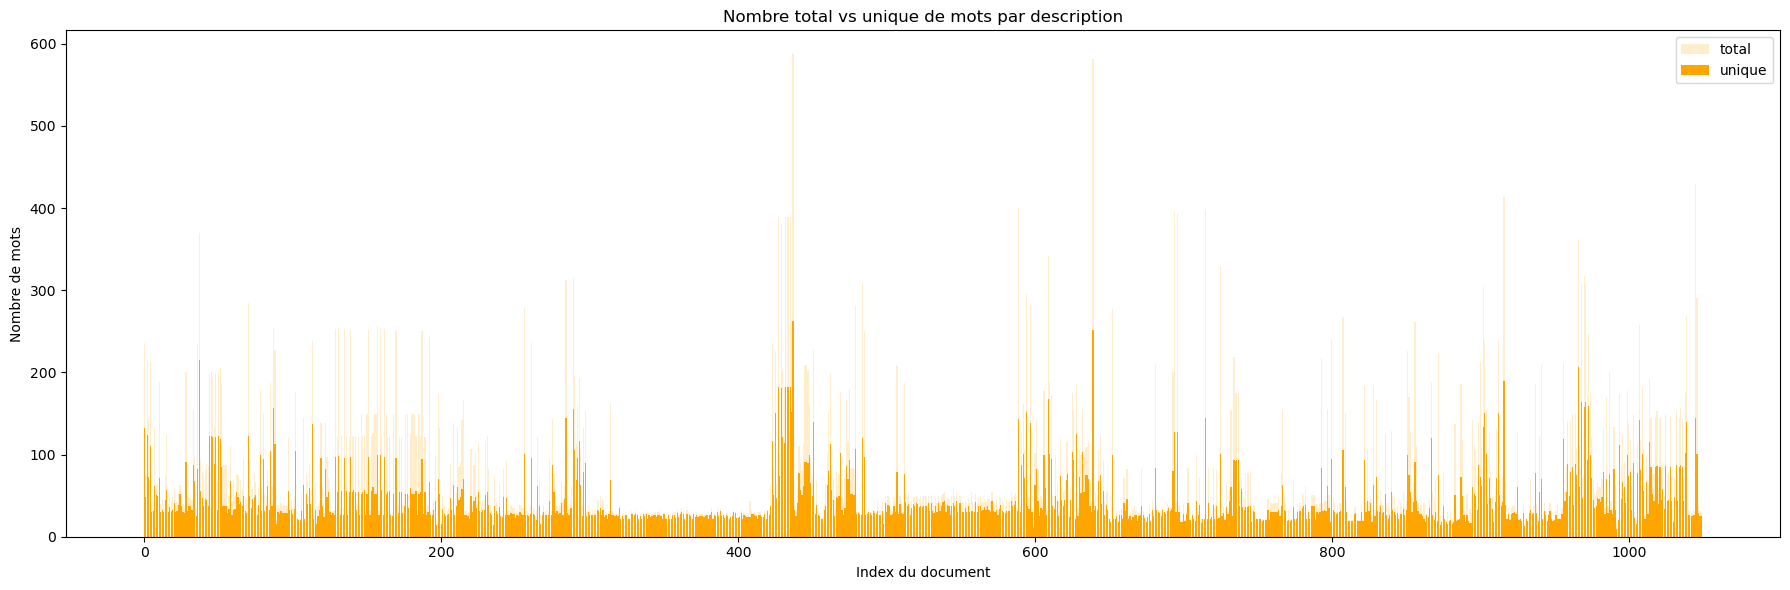

In [74]:
plt.figure(figsize=(18,6))

x = range(len(text_df))

plt.bar(x, text_df['total_words'], color='orange', alpha=0.2, label='total')
plt.bar(x, text_df['unique_words'], color='orange', alpha=1, label='unique')

plt.xlabel('Index du document')
plt.ylabel('Nombre de mots')
plt.title('Nombre total vs unique de mots par description')
plt.legend()
plt.tight_layout()
plt.show()

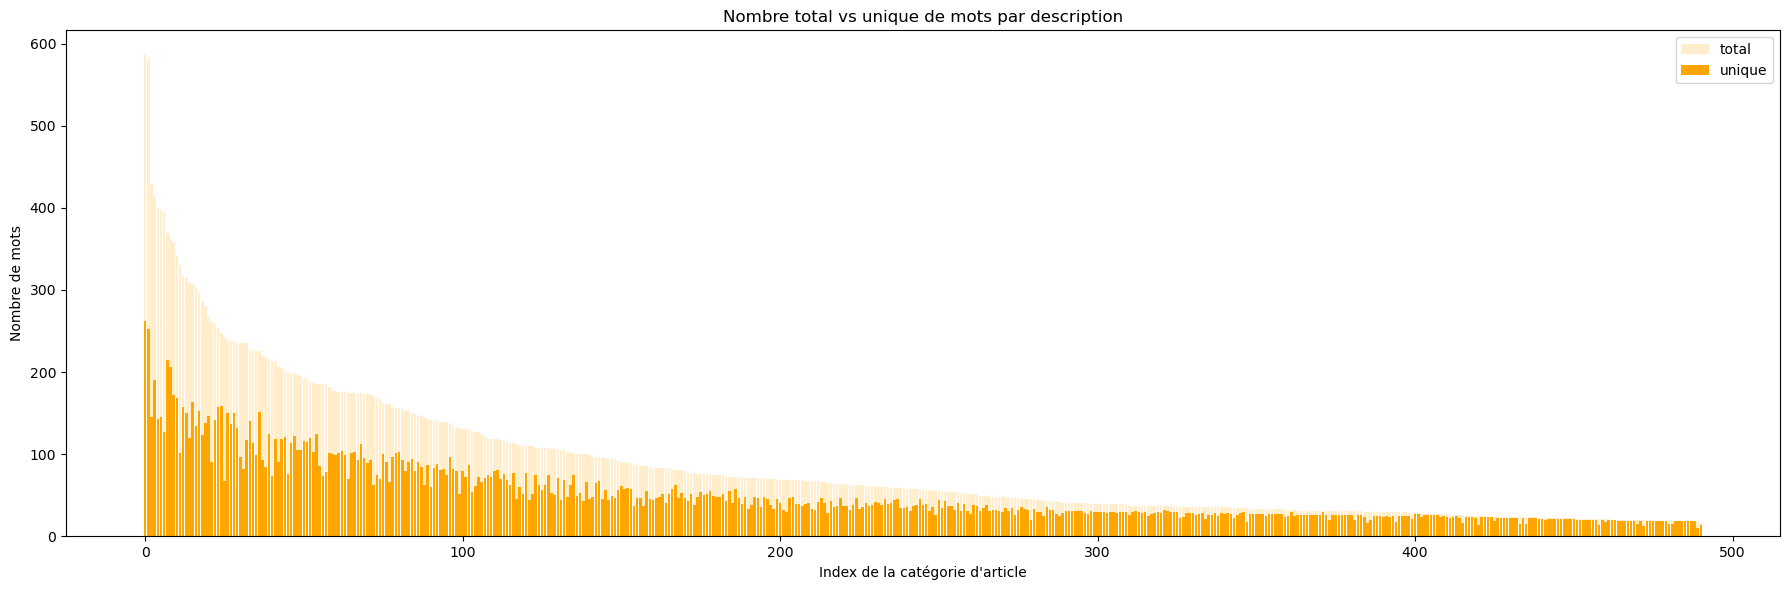

In [75]:
text_df['brand_str'] = text_df['brand'].astype(str)
text_df_cat = text_df.groupby('brand_str')[['total_words', 'unique_words']].mean().reset_index()
text_df_cat = text_df_cat.sort_values(by='total_words', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18,6))

x = range(len(text_df_cat))

plt.bar(x, text_df_cat['total_words'], color='orange', alpha=0.2, label='total')
plt.bar(x, text_df_cat['unique_words'], color='orange', alpha=1, label='unique')

plt.xlabel("Index de la catégorie d'article")
plt.ylabel('Nombre de mots')
plt.title('Nombre total vs unique de mots par description')
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
text_df_cat.head(10)

,brand_str,total_words,unique_words
0,HomeEdge,587.000000,262.000000
1,Sunlast,582.000000,252.000000
2,Oren Empower,429.000000,145.000000
3,wallskart,413.000000,190.000000
4,Shopfloor.XYZ,400.000000,143.000000
5,Pioneer Pragati,398.000000,145.000000
6,Tallenge,394.500000,127.500000
7,Dungri India Craft,370.000000,215.000000
8,Checkered Chef,362.000000,206.000000
9,Smartpro,358.142857,172.142857


In [77]:
all_words = [word for sublist in text_df['tokens'] for word in sublist]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('of', 1751), ('for', 1447), ('the', 1369), ('and', 1332), ('to', 1058), ('in', 1047), ('rs', 911), ('only', 890), ('with', 843), ('on', 835)]


In [78]:
name_words = [word for sublist in text_df['name_tokens'] for word in sublist]
name_word_counts = Counter(name_words)
most_common_words_name = name_word_counts.most_common(10)
print(most_common_words_name)

[('-', 286), ('For', 156), ('Watch', 150), ('Set', 129), ('Analog', 127), (',', 111), ('cm', 109), ('Showpiece', 104), ('Baby', 92), ('Combo', 90)]


Le soucis rencontré ici est que les mots les plus courants vont être ceux qui donnent le moins de signification comme "of", "for", "the", "and"... Nous allons devoir les enelver pour poursuivre l'analyse. 

In [79]:
stop_words = set(stopwords.words('english'))
text_df['tokens_wo'] = text_df['tokens'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])
text_df['name_tokens_wo'] = text_df['name_tokens'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])

all_words_sw = [word for sublist in text_df['tokens_wo'] for word in sublist]
word_counts_sw = Counter(all_words_sw)
most_common_words_sw = word_counts_sw.most_common(10)
print(most_common_words_sw)


[('rs', 911), ('products', 631), ('free', 618), ('buy', 581), ('delivery', 567), ('genuine', 564), ('shipping', 564), ('cash', 564), ('replacement', 559), ('1', 557)]


In [80]:
#Nombre total de mot par description
text_df['total_meaning_words'] = text_df['tokens_wo'].apply(len)

#Nombre de mots uniques par description
text_df['unique_words_wo'] = text_df['tokens_wo'].apply(lambda x: len(set(x)))

text_df.describe()

,retail_price,discounted_price,total_words,unique_words,total_meaning_words,unique_words_wo
count,1049.000000,1049.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2186.197331,1584.527169,77.820952,45.548571,58.948571,37.326667
std,7639.229411,7475.099680,76.525480,32.840459,52.500572,26.386743
min,35.000000,35.000000,14.000000,10.000000,13.000000,9.000000
25%,555.000000,340.000000,31.000000,26.000000,26.000000,22.000000
50%,999.000000,600.000000,44.000000,32.000000,37.000000,26.000000
75%,1999.000000,1199.000000,97.000000,52.000000,76.000000,42.000000
max,201000.000000,201000.000000,587.000000,262.000000,385.000000,217.000000


In [81]:
# Pour améliorer le lemmatization, sinon tous les mots sont considérés comme des noms communs 
# et la lemmatization est moins efficace
def get_wordnet_pos(word):
    # POS tag du mot (par exemple "NN", "VB", "JJ", ...)
    tag = nltk.pos_tag([word])[0][1][0].upper()
    
    # Correspondance NLTK → WordNet
    tag_dict = {
        "J": wordnet.ADJ,  # adjective
        "N": wordnet.NOUN, # noun
        "V": wordnet.VERB, # verb
        "R": wordnet.ADV   # adverb
    }
    
    # Retourne le tag wordnet (ou noun par défaut)
    return tag_dict.get(tag, wordnet.NOUN)

In [82]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

lemmatizer = WordNetLemmatizer()

text_df['tokens_lemma'] = text_df['tokens_wo'].apply(
    lambda tokens: [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
)
text_df['name_tokens_lemma'] = text_df['name_tokens_wo'].apply(
    lambda tokens: [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
)

text_df[['product_name','name_tokens_lemma','tokens_wo', 'tokens_lemma']].head(10)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,product_name,name_tokens_lemma,tokens_wo,tokens_lemma
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[Elegance, Polyester, Multicolor, Abstract, Ey...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor..."
1,Sathiyas Cotton Bath Towel,"[Sathiyas, Cotton, Bath, Towel]","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,..."
2,Eurospa Cotton Terry Face Towel Set,"[Eurospa, Cotton, Terry, Face, Towel, Set]","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t..."
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[SANTOSH, ROYAL, FASHION, Cotton, Printed, Kin...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton..."
4,Jaipur Print Cotton Floral King sized Double B...,"[Jaipur, Print, Cotton, Floral, King, size, Do...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ..."
5,Maserati Time R8851116001 Analog Watch - For ...,"[Maserati, Time, R8851116001, Analog, Watch, -...","[maserati, time, r8851116001, analog, watch, b...","[maserati, time, r8851116001, analog, watch, b..."
6,"Camerii WM64 Elegance Analog Watch - For Men,...","[Camerii, WM64, Elegance, Analog, Watch, -, Me...","[camerii, wm64, elegance, analog, watch, men, ...","[camerii, wm64, elegance, analog, watch, men, ..."
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[STAR, UFT-TSW-005-BK-BR, Analog, Watch, -, Boys]","[star, uft, tsw, 005, bk, br, analog, watch, b...","[star, uft, tsw, 005, bk, br, analog, watch, b..."
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[Alfajr, WY16B, Youth, Digital, Watch, -, Men,...","[alfajr, wy16b, youth, digital, watch, men, bo...","[alfajr, wy16b, youth, digital, watch, men, bo..."
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,"[TAG, Heuer, CAU1116.BA0858, Formula, 1, Analo...","[tag, heuer, cau1116, ba0858, formula, 1, anal...","[tag, heuer, cau1116, ba0858, formula, 1, anal..."


In [83]:
all_words_clean = [word for sublist in text_df['tokens_lemma'] for word in sublist]
word_counts_clean = Counter(all_words_clean)
most_common_words_clean = word_counts_clean.most_common(10)
print(most_common_words_clean)

[('r', 927), ('product', 864), ('free', 618), ('buy', 581), ('cm', 568), ('delivery', 567), ('genuine', 564), ('shipping', 564), ('cash', 564), ('price', 561)]


Le mot le plus commun est "r", c'est intriguant mais il y a peut-être une logique métier. 

## Application de la technique Bag of words

In [84]:
#Il faut des textes et pas des listes pour utiliser la technique Bag of words
text_df['cleaned_description'] = text_df['tokens_lemma'].apply(lambda tokens: ' '.join(tokens))
text_df['cleaned_product_name'] = text_df['name_tokens_lemma'].apply(lambda tokens: ' '.join(tokens))

text_df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
description_nettoyee        object
tokens                      object
name_tokens                 object
total_words                  int64
unique_words                 int64
brand_str                   object
tokens_wo                   object
name_tokens_wo              object
total_meaning_words          int64
unique_words_wo              int64
tokens_lemma                object
name_tokens_lemma           object
cleaned_description         object
cleaned_product_name

In [85]:
tfidf = TfidfVectorizer()
bow_matrix = tfidf.fit_transform(text_df['cleaned_description'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=tfidf.get_feature_names_out())
bow_df.head()


,00,000,001,0021,004,005,006,008,0083,01,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
pca = PCA(n_components=0.99)
pca_result = pca.fit_transform(bow_df)
print("Variance expliquée :", pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca.explained_variance_ratio_.sum())

Variance expliquée : [0.03541499 0.02425906 0.01830798 0.0161967  0.01370003 0.01137349
 0.01121436 0.00967737 0.00863366 0.00808583 0.00736544 0.00701254
 0.00685995 0.00662236 0.00656067 0.0062031  0.00592835 0.00582572
 0.00572061 0.00554796 0.0050077  0.00490766 0.00482821 0.00471436
 0.00468654 0.00451595 0.00440541 0.00438854 0.00427389 0.00404256
 0.00400406 0.00390369 0.00378861 0.0036659  0.00360784 0.0035618
 0.00342994 0.00339477 0.00335473 0.00332732 0.00325164 0.00309824
 0.00307765 0.00304928 0.00302687 0.00297604 0.00296887 0.0028801
 0.00285323 0.00283103 0.00281466 0.00271897 0.00268938 0.00267205
 0.00265045 0.00263462 0.00259881 0.00257488 0.00255169 0.00253084
 0.00248937 0.00246618 0.00245092 0.0024307  0.00240221 0.00234532
 0.00232695 0.00230722 0.00229753 0.00224608 0.00224374 0.00223193
 0.00221179 0.00219535 0.00215641 0.00215006 0.00211418 0.0021026
 0.0020896  0.00207696 0.00205906 0.00203252 0.00201951 0.00200905
 0.00199332 0.00197524 0.00195947 0.00194576

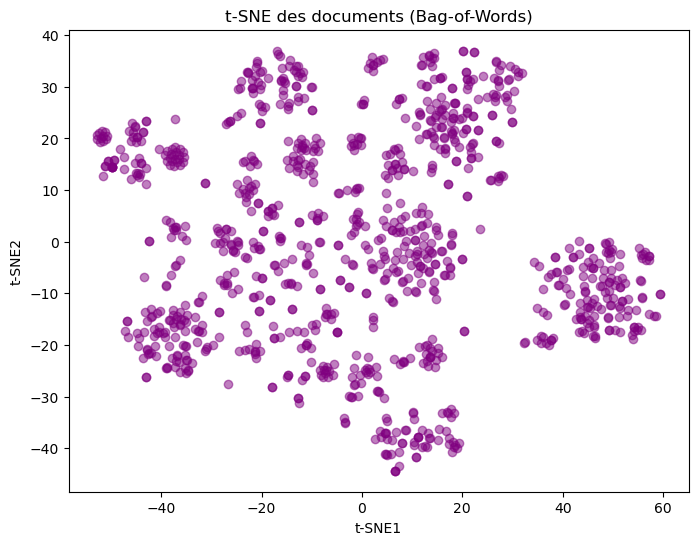

In [92]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_result = tsne.fit_transform(pca_result)

text_df['TSNE1'] = tsne_result[:, 0]
text_df['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1'], text_df['TSNE2'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [ ]:
#Je vais essayer de former des clusters cohérents avec KMeans sur cette représentation t-SNE
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(tsne_result)
text_df['cluster'] = kmeans.labels_

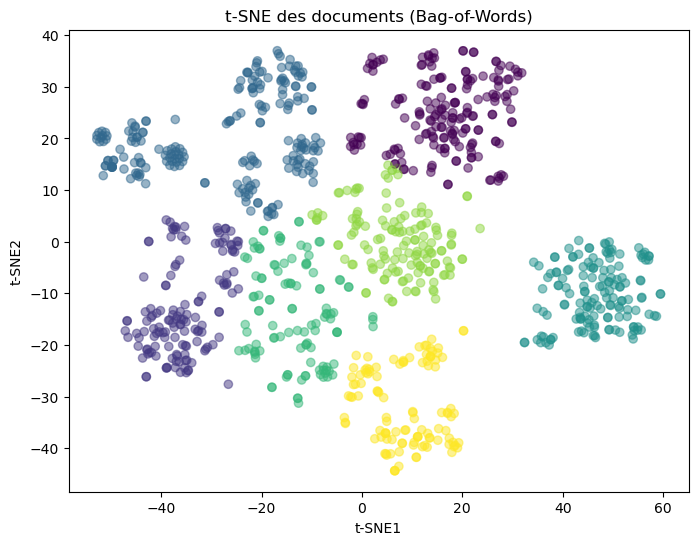

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1'], text_df['TSNE2'], c=text_df['cluster'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [104]:
for val in text_df['product_category_tree'].head():
    print(repr(val), type(val))

['Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...'] <class 'list'>
['Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...'] <class 'list'>
['Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...'] <class 'list'>
['Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...'] <class 'list'>
['Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...'] <class 'list'>


In [113]:
import ast
import re
import numpy as np

def _normalize_cat_str(x):
    if pd.isna(x):
        return ""
    if isinstance(x, list):
        s = " ".join(map(str, x))
    else:
        s = str(x).strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    s = " ".join(map(str, parsed))
            except Exception:
                pass
    s = s.replace("&gt;", ">>").replace("&amp;", "&")
    return s.strip(" []'\"")

def _split_levels(s):
    if not s:
        return []
    if ">>" in s:
        parts = [p.strip() for p in s.split(">>") if p.strip()]
    else:
        parts = [p.strip() for p in re.split(r'\s*>\s*', s) if p.strip()]
    return parts

def extract_first_level(x):
    parts = _split_levels(_normalize_cat_str(x))
    return parts[0] if parts else np.nan

def extract_last_level(x):
    parts = _split_levels(_normalize_cat_str(x))
    return parts[-1] if parts else np.nan

# application
text_df['categories'] = text_df['product_category_tree'].apply(extract_first_level)

text_df[['product_category_tree', 'categories']].head()

,product_category_tree,categories
0,[Home Furnishing >> Curtains & Accessories >> ...,Home Furnishing
1,[Baby Care >> Baby Bath & Skin >> Baby Bath To...,Baby Care
2,[Baby Care >> Baby Bath & Skin >> Baby Bath To...,Baby Care
3,[Home Furnishing >> Bed Linen >> Bedsheets >> ...,Home Furnishing
4,[Home Furnishing >> Bed Linen >> Bedsheets >> ...,Home Furnishing


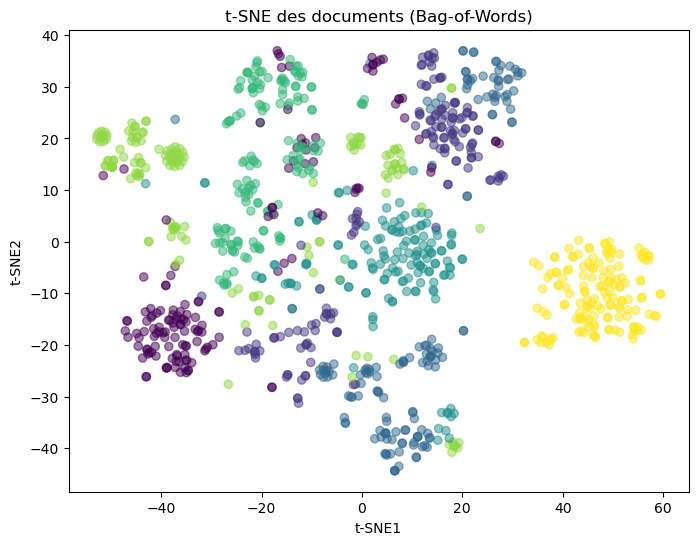

In [116]:
text_df['cat_code'] = text_df['categories'].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1'], text_df['TSNE2'], c=text_df['cat_code'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()